# WeatherPy
----

ANALYSIS
* Humidity and cloudiness do not correlate strongly with latitude.
*Temperature and latitude have a strong correlation, with temperatures increasing with proximity to the equator.
*Wind Speed mostly falls into the same general range, regardless of latitude


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

name=[]        
cloud=[]        
ctry=[]        
date=[]         
humi=[]        
lat=[]          
lng=[]          
maxtemp=[]      
wind=[]       

count=1

print('Getting Cities')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                # Ignore errors in response.
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            print('City not found. Skipping')             # Make an exception incase link is invalid
              
        count=count+1
        
print("-"*20)
print("Complete")      
print("-"*20)

Getting Cities
-----------------------------
Processing Record 1 of 614 | albany
Processing Record 2 of 614 | mahebourg
Processing Record 3 of 614 | bluff
Processing Record 4 of 614 | provideniya
Processing Record 5 of 614 | mys shmidta
City not found. Skipping
Processing Record 6 of 614 | lebu
Processing Record 7 of 614 | atar
Processing Record 8 of 614 | rikitea
Processing Record 9 of 614 | ancud
Processing Record 10 of 614 | vaini
Processing Record 11 of 614 | sentyabrskiy
City not found. Skipping
Processing Record 12 of 614 | kapaa
Processing Record 13 of 614 | longyearbyen
Processing Record 14 of 614 | panguna
Processing Record 15 of 614 | kudahuvadhoo
Processing Record 16 of 614 | vanimo
Processing Record 17 of 614 | ushuaia
Processing Record 18 of 614 | nikolskoye
Processing Record 19 of 614 | klaksvik
Processing Record 20 of 614 | satitoa
City not found. Skipping
Processing Record 21 of 614 | bredasdorp
Processing Record 22 of 614 | lompoc
Processing Record 23 of 614 | chicama


Processing Record 193 of 614 | dunedin
Processing Record 194 of 614 | cam ranh
Processing Record 195 of 614 | menongue
Processing Record 196 of 614 | gilbues
Processing Record 197 of 614 | tottori
Processing Record 198 of 614 | yar-sale
Processing Record 199 of 614 | lake jackson
Processing Record 200 of 614 | hithadhoo
Processing Record 201 of 614 | hovd
Processing Record 202 of 614 | emba
Processing Record 203 of 614 | palabuhanratu
City not found. Skipping
Processing Record 204 of 614 | katangli
Processing Record 205 of 614 | sao felix do xingu
Processing Record 206 of 614 | belaya gora
Processing Record 207 of 614 | aripuana
Processing Record 208 of 614 | vallenar
Processing Record 209 of 614 | fairbanks
Processing Record 210 of 614 | okato
Processing Record 211 of 614 | xiongzhou
Processing Record 212 of 614 | bonfim
Processing Record 213 of 614 | mataura
Processing Record 214 of 614 | airai
Processing Record 215 of 614 | cidreira
Processing Record 216 of 614 | yenagoa
Processing 

Processing Record 389 of 614 | rodrigues alves
Processing Record 390 of 614 | aguascalientes
Processing Record 391 of 614 | richards bay
Processing Record 392 of 614 | boralday
Processing Record 393 of 614 | savinskiy
Processing Record 394 of 614 | yulara
Processing Record 395 of 614 | robertsport
Processing Record 396 of 614 | hobyo
Processing Record 397 of 614 | san lucas
Processing Record 398 of 614 | bolungarvik
City not found. Skipping
Processing Record 399 of 614 | franklin
Processing Record 400 of 614 | wangaratta
Processing Record 401 of 614 | voh
Processing Record 402 of 614 | qeshm
Processing Record 403 of 614 | le mans
Processing Record 404 of 614 | plavsk
Processing Record 405 of 614 | ijaki
City not found. Skipping
Processing Record 406 of 614 | amuntai
Processing Record 407 of 614 | warmbad
Processing Record 408 of 614 | kawalu
Processing Record 409 of 614 | hami
Processing Record 410 of 614 | mbanza-ngungu
Processing Record 411 of 614 | tlahualilo
City not found. Skippin

Processing Record 585 of 614 | chern
Processing Record 586 of 614 | chopinzinho
Processing Record 587 of 614 | kaffrine
Processing Record 588 of 614 | aitape
Processing Record 589 of 614 | hambantota
Processing Record 590 of 614 | louisbourg
City not found. Skipping
Processing Record 591 of 614 | governador valadares
Processing Record 592 of 614 | gorontalo
Processing Record 593 of 614 | okakarara
Processing Record 594 of 614 | san quintin
Processing Record 595 of 614 | pangnirtung
Processing Record 596 of 614 | sai buri
Processing Record 597 of 614 | hanchuan
Processing Record 598 of 614 | pontes e lacerda
Processing Record 599 of 614 | beira
Processing Record 600 of 614 | harnosand
Processing Record 601 of 614 | harper
Processing Record 602 of 614 | nakhon si thammarat
Processing Record 603 of 614 | baiyin
Processing Record 604 of 614 | sistranda
Processing Record 605 of 614 | arona
Processing Record 606 of 614 | ostrovnoy
Processing Record 607 of 614 | topolog
Processing Record 608 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness': cloud,
    'Humidity': humi,
    'Max Temp': maxtemp,
    'Wind Speed': wind
}

WeatherPy_df=pd.DataFrame(weather_dict)

WeatherPy_df.isnull().sum()
WeatherPy_df.dropna() 
WeatherPy_df.count()

City          560
Country       560
Date          560
Lat           560
Lng           560
Cloudiness    560
Humidity      560
Max Temp      560
Wind Speed    560
dtype: int64

In [5]:
WeatherPy_df = WeatherPy_df.reset_index(drop=True)
WeatherPy_df = WeatherPy_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                             "Wind Speed", "Country", "Date"]]

WeatherPy_df['Lat'] = WeatherPy_df['Lat'].astype(float, errors = 'raise')
WeatherPy_df['Lng'] = WeatherPy_df['Lng'].astype(float, errors = 'raise')
WeatherPy_df['Max Temp'] = WeatherPy_df['Max Temp'].astype(float, errors = 'raise')
WeatherPy_df['Cloudiness'] = WeatherPy_df['Cloudiness'].astype(float, errors = 'raise')
WeatherPy_df['Wind Speed'] = WeatherPy_df['Wind Speed'].astype(float, errors = 'raise')
WeatherPy_df['Date'] = WeatherPy_df['Date'].astype(float, errors = 'raise')

WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

WeatherPy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,80.64,61,99.0,4.29,US,1.659308e+09
1,Mahébourg,-20.4081,57.7000,70.25,73,75.0,11.50,MU,1.659308e+09
2,Bluff,-46.6000,168.3333,46.80,76,51.0,15.17,NZ,1.659308e+09
3,Provideniya,64.3833,-173.3000,48.36,81,0.0,4.47,RU,1.659308e+09
4,Lebu,-37.6167,-73.6500,47.01,83,95.0,5.30,CL,1.659308e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#humiditytest = WeatherPy_df["Humidity"].describe(include = "all")
#humiditytest
print("No cities with humidity >100")

No cities with humidity >100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

/var/folders/nj/ck14vk610nsfjb48f5yl6x8h0000gp/T/ipykernel_12734/3677609339.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")


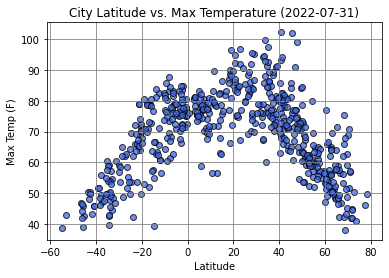

In [17]:
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Max Temp'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


plt.title('City Latitude vs. Max Temperature' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

plt.savefig('output_data/City Latitude vs. MaxTemp.png')

plt.show()


This shows the max temperature for cities based on their distance from the equator.

## Latitude vs. Humidity Plot

/var/folders/nj/ck14vk610nsfjb48f5yl6x8h0000gp/T/ipykernel_12734/1094372315.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")


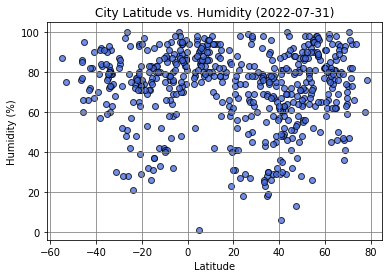

In [18]:
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Humidity'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)

plt.title('City Latitude vs. Humidity' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
plt.savefig('output_data/City Latitude vs. Humidity.png')
plt.show()


This models the level of humidity in a city based on it's proximity to the equator.

## Latitude vs. Cloudiness Plot

/var/folders/nj/ck14vk610nsfjb48f5yl6x8h0000gp/T/ipykernel_12734/519834545.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")


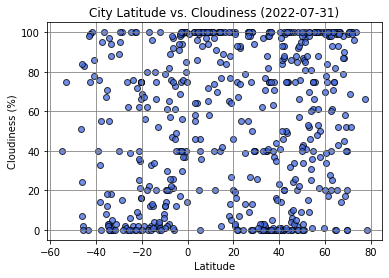

In [19]:
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Cloudiness'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)
plt.title('City Latitude vs. Cloudiness' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
plt.savefig('output_data/City Latitude vs. Cloudiness.png')
plt.show()


This shows the relationship between cloudiness and latitude, with no strong correlation between the two.

## Latitude vs. Wind Speed Plot

/var/folders/nj/ck14vk610nsfjb48f5yl6x8h0000gp/T/ipykernel_12734/2391249254.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")


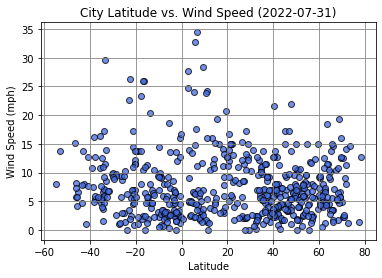

In [20]:
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Wind Speed'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)
plt.title('City Latitude vs. Wind Speed' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
plt.savefig('output_data/City Latitude vs. Wind Speed.png')
plt.show()


This models wind speed vs latitude and finds that wind speed is closely clustered everywhere regardless of latitude.

## Linear Regression

In [21]:
weather_data_north = WeatherPy_df[WeatherPy_df['Lat'] >= 0]
weather_data_south = WeatherPy_df[WeatherPy_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6417913079887657


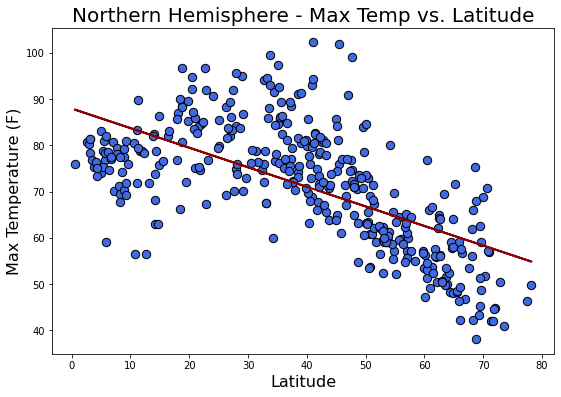

In [22]:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

plt.show()


This models max temp vs latitude, showing a correlation between the two because the temperature decreases as the latitude draws away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8199412281018638


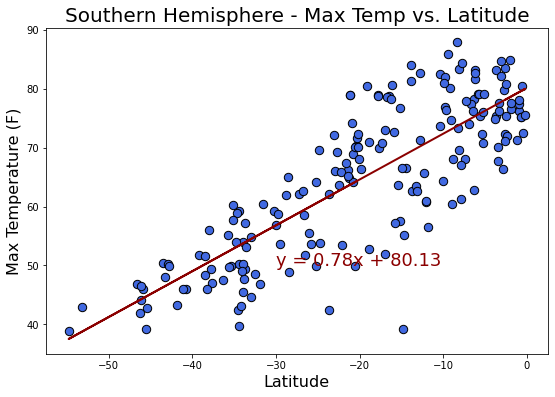

In [23]:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 50),fontsize=18, color='darkred')
print(f'The r-value is: {rvalue}')
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')
plt.show()


As with the Northern Hemisphere, this models max temp vs latitude, showing a correlation between the two because the temperature increases as the latitude draws toward from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.016667380157301938


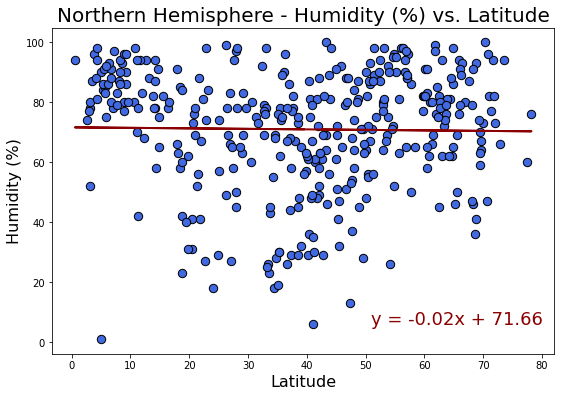

In [24]:

plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')




print(f'The r-value is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Humidity_North.png')


plt.show()

This models the relationship between humidity and latitude, showing almost no correlation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0367591267858933


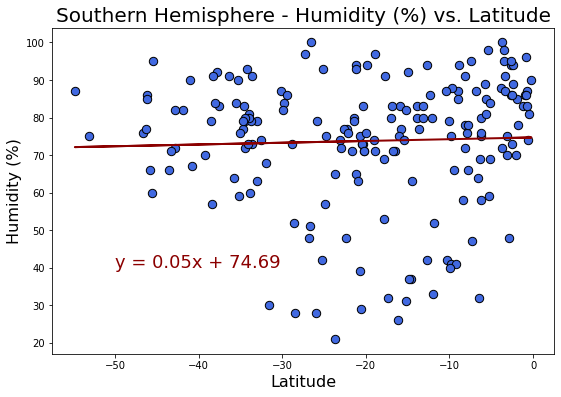

In [25]:

plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-50,40), fontsize=18, color='darkred')





print(f'The r-value is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Humidity_South.png')


plt.show()

Similar to the northern hemisphere, this models the relationship between humidity and latitude, showing almost no correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.05004284852767508


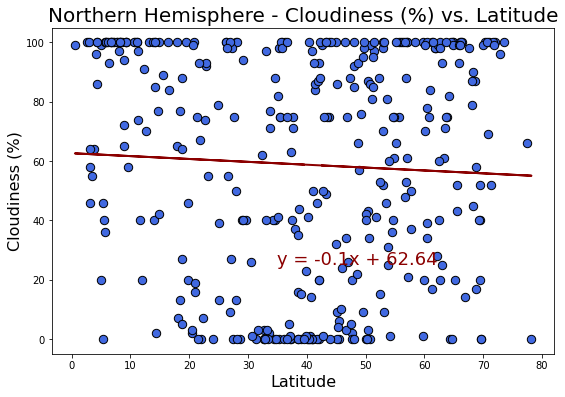

In [27]:

plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')





print(f'The r-value is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')


plt.show()

This models the relationship between cloudiness and latitude, showing almost no correlation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13501406308432337


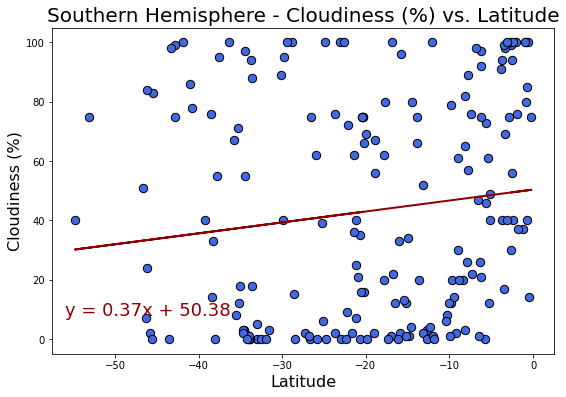

In [28]:

plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')




print(f'The r-value is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')


plt.show()

This models the relationship between cloudiness and latitude, showing almost no correlation, same as the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14961517296259055


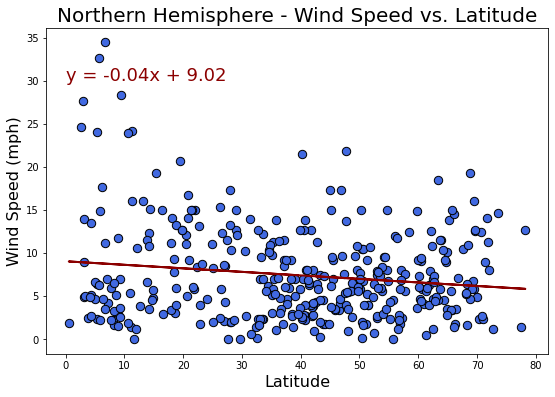

In [29]:

plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='darkred')





print(f'The r-value is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Wind_North.png')


plt.show()

This models the relationship between wind speed and latitude, showing almost no correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2031798812278472


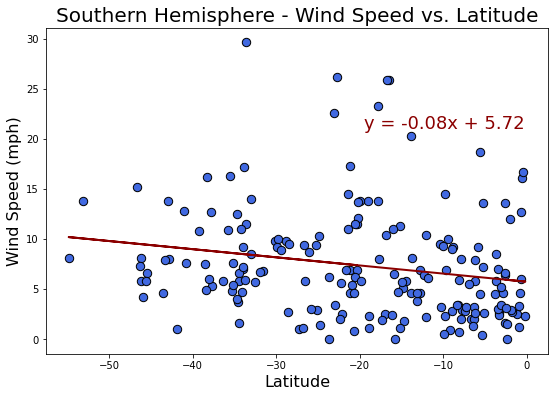

In [30]:

plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')




print(f'The r-squared is: {rvalue}')


plt.savefig('output_data/City Latitude vs. Wind_South.png')


plt.show()

This models the relationship between wind speed and latitude, showing almost no correlation similar to the northern hemisphere.